In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
# data
result_after = pd.read_csv('result.csv')
result_before = pd.read_csv('result_before_remove_equals.csv')
compare_after = pd.read_csv('compare.csv')
compare_before = pd.read_csv('compare_before_remove_equals.csv')

# Pre analysis

In [3]:
# columns name
print("results: " + ", ".join(result_after.columns.tolist()))
print("compare: " + ", ".join(compare_after.columns.tolist()))

results: projectname, version, domain, #LOC, #AA, %disciplined, %IF, %CA, %EI, %PA, %EX, %NC, total disciplined
compare: projectname, diff loc, diff blocks, diff % disciplined, diff disciplined


In [4]:
# show results
print(result_after)

    projectname   version                  domain    #LOC   #AA  %disciplined  \
0        apache    2.2.11              Web server   35873   350         82.00   
1        apache    2.4.46              Web server   78287   387         86.30   
2   berkeley.db      18.1              Web server  252018  3823         92.68   
3   berkeley.db    4.7.25              Web server  178003  3077         92.46   
4      cherokee   0.99.11         database system    4383    19         89.47   
..          ...       ...                     ...     ...   ...           ...   
61         xfig    3.2.8a  vector graphics editor    1063    16         87.50   
62      xinelib    1.1.16           media library     940     3        100.00   
63      xinelib  1.1.20.1           media library    1788     3         33.33   
64        xterm     2.4.3       terminal emulator    1729    99         94.95   
65        xterm    3.1.7c       terminal emulator    7780    70        100.00   

     %IF  %CA  %EI   %PA   

In [5]:
# show compare
print(compare_after)

    projectname  diff loc  diff blocks  diff % disciplined  diff disciplined
0        apache     42414           37                4.30                46
1   berkeley.db     74015          746                0.22               697
2      cherokee      1543           18               10.53                21
3        clamav    149347         1202                1.87              1092
4       cpython     47913         -607               -1.58              -650
5           dia      3589           34                4.35                37
6         emacs     33914         2261               -0.84              2113
7       freebsd   5969007        50749                0.42             46820
8           gcc   1472906         5849                2.61              5296
9   ghostscript    688060         4049               -1.68              3579
10         gimp    127583           91               -1.66                83
11        glibc    122509         1372                3.46              1377

In [6]:
compare_before_after = pd.concat([compare_before['projectname'], compare_after['projectname'], \
                                 compare_before['diff % disciplined'], compare_after['diff % disciplined'],\
                                 compare_before['diff loc'], compare_after['diff loc'], \
                                 compare_before['diff blocks'], compare_after['diff blocks']], \
                                axis=1, \
                                keys = ['name before','name after',\
                                        'diff % disc before', 'diff % disc after',\
                                        'diff loc before', 'diff loc after', \
                                        'diff blocks before', 'diff blocs after'])
print(compare_before_after)

    name before   name after  diff % disc before  diff % disc after  \
0        apache       apache                1.42               4.30   
1   berkeley.db  berkeley.db                0.29               0.22   
2      cherokee     cherokee                1.08              10.53   
3        clamav       clamav                5.29               1.87   
4       cpython      cpython               -0.66              -1.58   
5           dia          dia               -0.83               4.35   
6         emacs        emacs               -1.81              -0.84   
7       freebsd      freebsd                0.08               0.42   
8           gcc          gcc                0.31               2.61   
9   ghostscript  ghostscript               -1.04              -1.68   
10         gimp         gimp                0.74              -1.66   
11        glibc        glibc                7.76               3.46   
12     gnumeric     gnumeric                6.67               7.85   
13    

<AxesSubplot:xlabel='name before'>

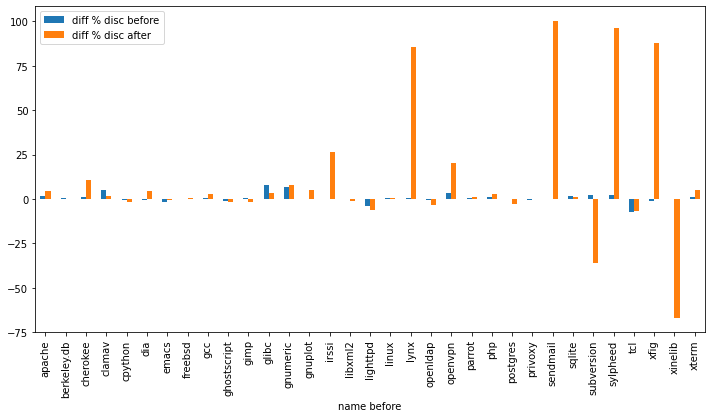

In [15]:
compare_before_after.plot(x='name before', y=['diff % disc before', 'diff % disc after'], kind='bar', figsize=(12,6))

In [22]:
manipuled_cases = ['xfig', 'openvpn', 'ghostscript']

for m_case in manipuled_cases:
    print(result_after.loc[result_after['projectname'] == m_case].drop(['version', 'domain', 'total disciplined'], axis=1))

   projectname  #LOC  #AA  %disciplined  %IF  %CA  %EI  %PA  %EX   %NC
60        xfig    34    0           0.0  0.0  0.0  0.0  0.0  0.0   0.0
61        xfig  1063   16          87.5  0.0  0.0  0.0  0.0  0.0  12.5
   projectname   #LOC  #AA  %disciplined  %IF  %CA  %EI   %PA   %EX   %NC
40     openvpn  13991  340         73.82  0.0  0.0  0.0  1.18  0.00  25.0
41     openvpn  25898  396         94.19  0.0  0.0  0.0  0.00  1.01   4.8
    projectname    #LOC   #AA  %disciplined   %IF  %CA  %EI   %PA   %EX    %NC
18  ghostscript  249081  1264         90.59  0.00  0.0  0.0  0.08  0.16   9.18
19  ghostscript  937141  5313         88.91  0.02  0.0  0.0  0.04  0.55  10.48


In [20]:
special_cases = ['lynx', 'privoxy', 'sendmail', 'sylpheed', 'xfig']

for s_case in special_cases:
    print(result_after.loc[result_after['projectname'] == s_case].drop(['version', 'domain', 'total disciplined'], axis=1))

   projectname  #LOC  #AA  %disciplined  %IF  %CA  %EI  %PA  %EX    %NC
36        lynx     0    0          0.00  0.0  0.0  0.0  0.0  0.0   0.00
37        lynx  8351   54         85.19  0.0  0.0  0.0  3.7  0.0  11.11
   projectname  #LOC  #AA  %disciplined  %IF  %CA  %EI  %PA  %EX  %NC
48     privoxy     0    0           0.0  0.0  0.0  0.0  0.0  0.0  0.0
49     privoxy     0    0           0.0  0.0  0.0  0.0  0.0  0.0  0.0
   projectname  #LOC  #AA  %disciplined  %IF  %CA  %EI  %PA  %EX  %NC
50    sendmail     4    0           0.0  0.0  0.0  0.0  0.0  0.0  0.0
51    sendmail  1034   19         100.0  0.0  0.0  0.0  0.0  0.0  0.0
   projectname  #LOC  #AA  %disciplined  %IF  %CA  %EI  %PA  %EX   %NC
56    sylpheed     0    0          0.00  0.0  0.0  0.0  0.0  0.0  0.00
57    sylpheed  3847   53         96.23  0.0  0.0  0.0  0.0  0.0  3.77
   projectname  #LOC  #AA  %disciplined  %IF  %CA  %EI  %PA  %EX   %NC
60        xfig    34    0           0.0  0.0  0.0  0.0  0.0  0.0   0.0
61       

In [31]:
print(compare_after.loc[compare_after['diff % disciplined'] > 3.0])

print()
print("total - 'special cases': " + str(len(compare_after.loc[compare_after['diff % disciplined'] > 3.0]) - 4))

   projectname  diff loc  diff blocks  diff % disciplined  diff disciplined
0       apache     42414           37                4.30                46
2     cherokee      1543           18               10.53                21
5          dia      3589           34                4.35                37
11       glibc    122509         1372                3.46              1377
12    gnumeric     -9585         -698                7.85              -569
13     gnuplot      6418           28                5.15                28
14       irssi      2745           -7               26.32                -1
18        lynx      8351           54               85.19                46
20     openvpn     11907           56               20.37               121
25    sendmail      1030           19              100.00                19
28    sylpheed      3847           53               96.23                50
30        xfig      1029           16               87.50                14
32       xte